# Betrachtung von Kombinationen von Merkmalen

## Laden

Laden der Bibliotheken

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

Laden der Daten

In [2]:
#df = pd.read_csv('../Loading/df_PreiseStationen.csv')
df = pd.read_csv('df_PreiseStationenAngepasst.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73589 entries, 0 to 73588
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0.1       73589 non-null  int64  
 1   Unnamed: 0         73589 non-null  int64  
 2   station_uuid       73589 non-null  object 
 3   hour               73589 non-null  object 
 4   diesel             73589 non-null  float64
 5   e5                 73589 non-null  float64
 6   e10                73589 non-null  float64
 7   dieselchange       73589 non-null  float64
 8   e5change           73589 non-null  float64
 9   e10change          73589 non-null  float64
 10  brand              68097 non-null  object 
 11  city               73589 non-null  object 
 12  street             73589 non-null  object 
 13  house_number       73589 non-null  int64  
 14  name               73589 non-null  object 
 15  post_code          73589 non-null  int64  
 16  latitude           735

## Kraftstoff vs. Zeit

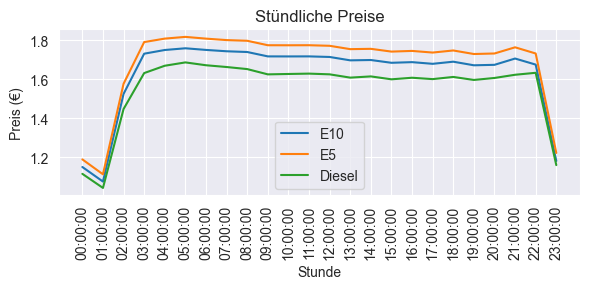

In [4]:
# Quelle: https://seaborn.pydata.org/generated/seaborn.lineplot.html
plt.figure(figsize=(6, 3))
sns.lineplot(x='hour', y='e10', data=(df.groupby('hour', observed=False)[['e10', 'diesel', 'e5']].mean().reset_index()), label='E10')
sns.lineplot(x='hour', y='e5', data=(df.groupby('hour', observed=False)[['e10', 'diesel', 'e5']].mean().reset_index()), label='E5')
sns.lineplot(x='hour', y='diesel', data=(df.groupby('hour', observed=False)[['e10', 'diesel', 'e5']].mean().reset_index()), label='Diesel')

plt.title("Stündliche Preise")
plt.xlabel("Stunde")
plt.ylabel("Preis (€)")
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

Auffälligkeiten:
- Die Preise sind um Mitternacht am niedrigsten, dies entspricht nicht der Realität.
- Da die meisten Tankstellen um Mitternacht schließen, werden hier keine Daten übermittelt, die die Ergebnissen dann verzerren.
- Über den Tag kann man sehen, dass es früh am morgen, gegen 3-4 Uhr etwas teurer ist.
- Gegen Nachmittag verringern sich die Preise minimal.
- Am Abend gegen 21-22 Uhr steigen die Preise erneut.

## Kraftstoff vs. Weekday

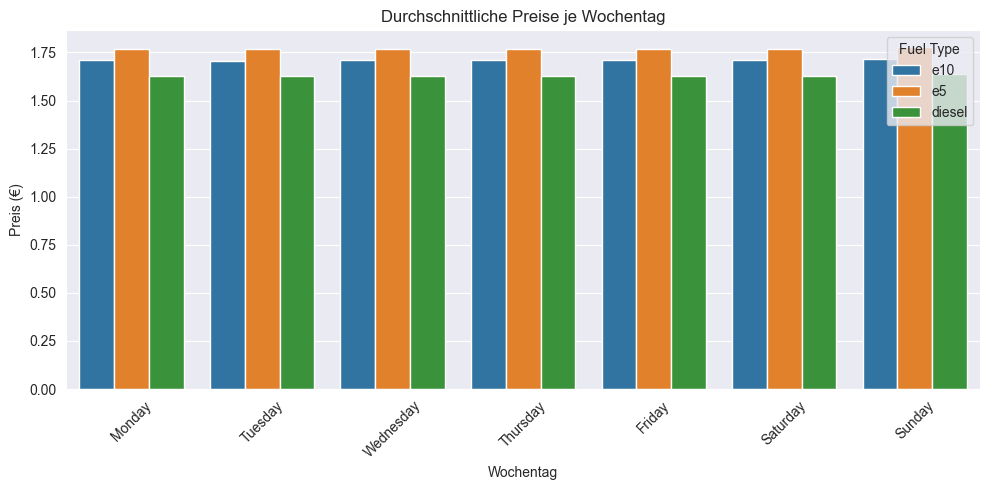

In [5]:
# Quelle: https://seaborn.pydata.org/generated/seaborn.barplot.html
weekday_avg = df.groupby('weekday', observed=False)[['e10', 'e5', 'diesel']].mean().reset_index()
weekday_long = weekday_avg.melt(id_vars='weekday', value_vars=['e10', 'e5', 'diesel'], var_name='Fuel', value_name='Price')
weekday_long['weekday'] = pd.Categorical(weekday_long['weekday'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
plt.figure(figsize=(10, 5))
sns.barplot(data=weekday_long, x='weekday', y='Price', hue='Fuel')

plt.title("Durchschnittliche Preise je Wochentag")
plt.xlabel("Wochentag")
plt.ylabel("Preis (€)")
plt.xticks(rotation=45)
plt.legend(title='Fuel Type')
plt.tight_layout()
plt.show()

Auffälligkeiten:
- An jedem Tag ist e5 der teuerste Kraftstoff, gefolgt von E10.
- Diesel ist immer der günstigste Kraftstoff.
- Einen starken Unterschied zwischen den Tagen kann man bei den Preisen nicht eindeutig erkennen in der Abbildung.

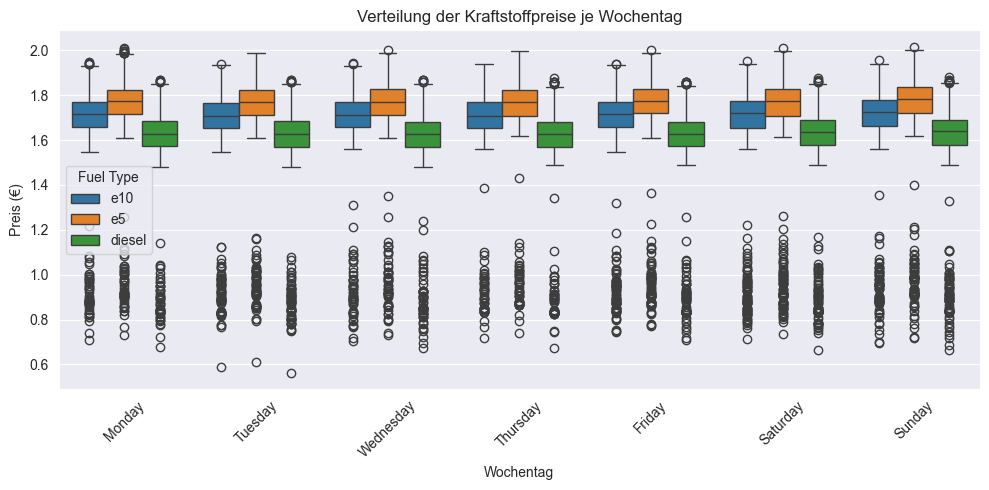

In [6]:
# Quelle: https://seaborn.pydata.org/generated/seaborn.boxplot.html
weekday_long = df.melt(
    id_vars='weekday',
    value_vars=['e10', 'e5', 'diesel'],
    var_name='Fuel',
    value_name='Price'
)
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_long['weekday'] = pd.Categorical(weekday_long['weekday'], categories=weekday_order, ordered=True)

plt.figure(figsize=(10, 5))
sns.boxplot(data=weekday_long, x='weekday', y='Price', hue='Fuel')
plt.title("Verteilung der Kraftstoffpreise je Wochentag")
plt.xlabel("Wochentag")
plt.ylabel("Preis (€)")
plt.xticks(rotation=45)
plt.legend(title='Fuel Type')
plt.tight_layout()
plt.show()

Auffälligkeiten:
- Es gibt am Dienstag die am wenigsten verteilten Ausreißer.
- Diesel hat am jedem Tag auch Ausreißer nach oben.
- Die anderen Kraftstoffe haben auch Ausreißer nach oben, allerdings nicht zu jedem Tag.
- Über die Woche sind keine unterschiede in der Verteilung zu erkennen, bei den jeweiligen Kraftstoffen.

## Kraftstoff vs. Datum

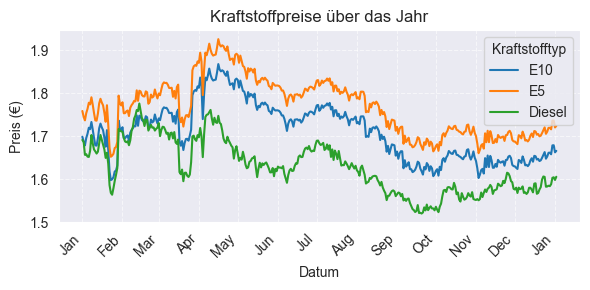

In [7]:
# Quelle: https://seaborn.pydata.org/generated/seaborn.lineplot.html
sns.lineplot(x='date', y='e10', data=(df.groupby('date', observed=False)[['e10', 'diesel', 'e5']].mean().reset_index()), label='E10')
sns.lineplot(x='date', y='e5', data=(df.groupby('date', observed=False)[['e10', 'diesel', 'e5']].mean().reset_index()), label='E5')
sns.lineplot(x='date', y='diesel', data=(df.groupby('date', observed=False)[['e10', 'diesel', 'e5']].mean().reset_index()), label='Diesel')

plt.figure(figsize=(6, 3))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1)) # Alle Monate markieren
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b')) # Format: Jan 2024
plt.xticks(rotation=45, ha='right')

plt.title('Kraftstoffpreise über das Jahr')
plt.xlabel('Datum')
plt.ylabel('Preis (€)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Kraftstofftyp')
plt.tight_layout()
plt.show()

Auffälligkeiten:
- Es ist zu erkennen, dass die Kraftstoffe im Februar und April Ausreißer nach unten haben.
- Alle drei Kraftstoffarten steigen im Zeitraum Februar bis Mai.
    - E5 erreicht in dieser Phase einen Wert von über 1,90€.
- Ab etwa Juni/Juli sinken alle Preise gleichmäßig
    - Tiefpunkt bei Diesel ist im Oktober/November, bei ca. 1,50€.
- Danach eine leichte Steigerung gegen Jahresende

## Kraftstoff vs. Postleitzahl

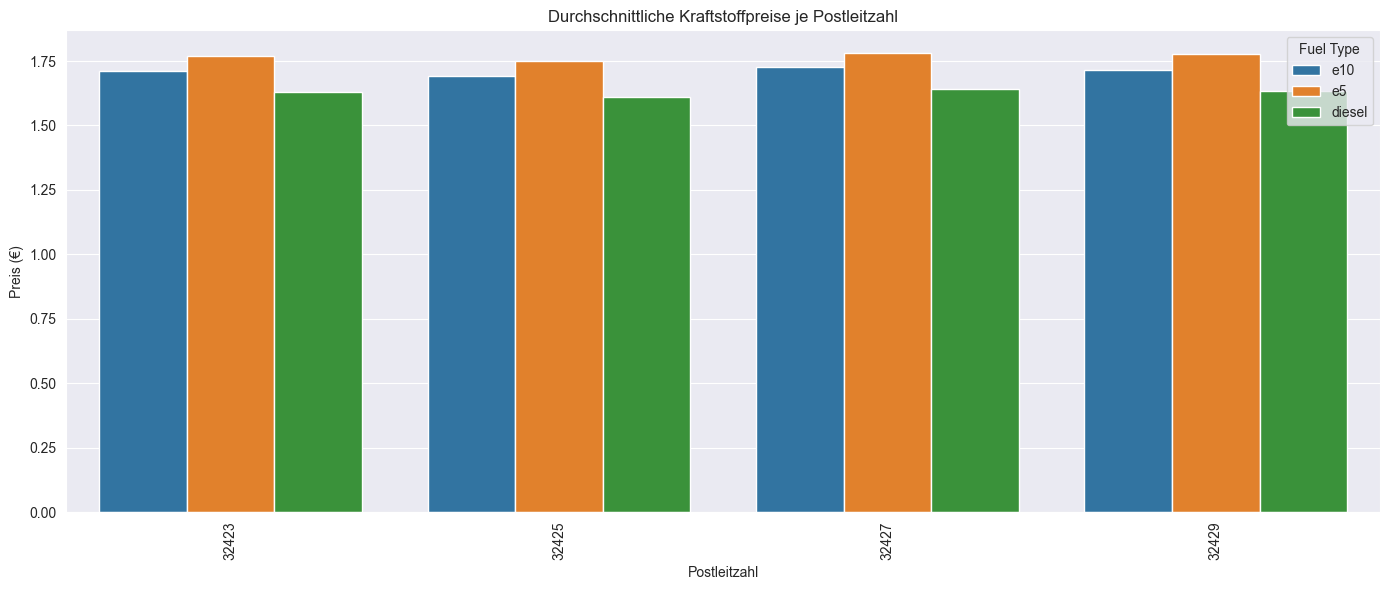

In [8]:
# Quelle: https://seaborn.pydata.org/generated/seaborn.barplot.html
post_code_avg = df.groupby('post_code', observed=False)[['e10', 'e5', 'diesel']].mean().reset_index()
post_code_long = post_code_avg.melt(id_vars='post_code', value_vars=['e10', 'e5', 'diesel'], var_name='Fuel', value_name='Price')

plt.figure(figsize=(14, 6))
sns.barplot(data=post_code_long, x='post_code', y='Price', hue='Fuel')
plt.title("Durchschnittliche Kraftstoffpreise je Postleitzahl")
plt.xlabel("Postleitzahl")
plt.ylabel("Preis (€)")
plt.xticks(rotation=90)
plt.legend(title='Fuel Type')
plt.tight_layout()
plt.show()

Auffälligkeiten:
- Die Preise sind über die vier Postleitzahlen sehr ähnlich.

## Kraftstoff vs. Brand

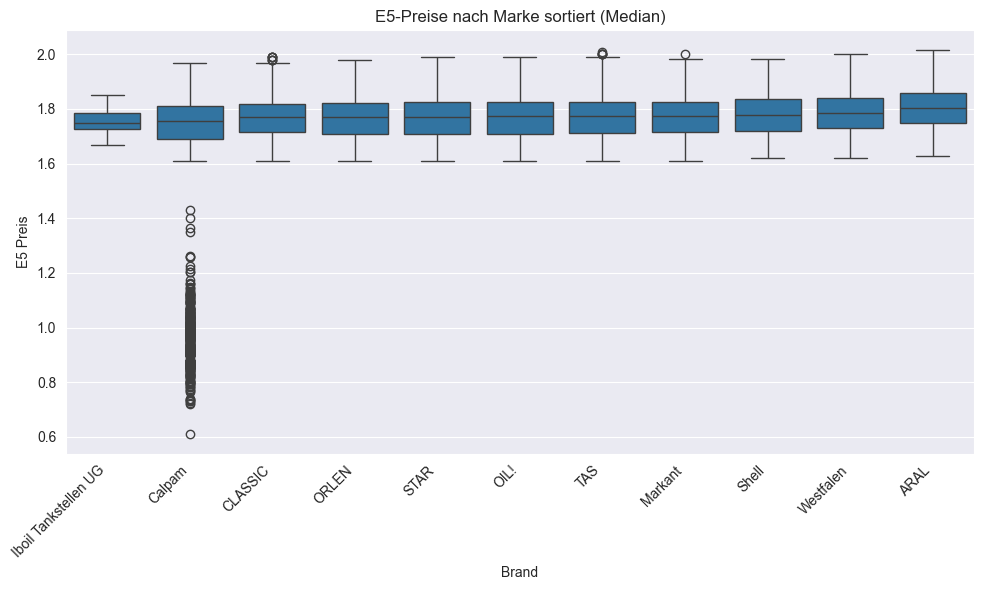

In [9]:
# Quelle: https://seaborn.pydata.org/generated/seaborn.boxplot.html
sns.boxplot(data=df, x='brand', y='e5', order=df.groupby('brand')['e5'].median().sort_values().index)

plt.figure(figsize=(10, 6))
plt.title('E5-Preise nach Marke sortiert (Median)')
plt.xlabel('Brand')
plt.ylabel('E5 Preis')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Auffälligkeiten:
- Calpam zeigt eine extreme Streuung nach unten:
    - Viele Ausreißer liegen bei unter 1,40€, einige sogar bei unter 1,00€, bis hinunter zu ca. 0,60€.
    - Die Box selbst liegt im normalen Bereich (etwa 1,75€), aber die vielen Ausreißer verzerren die Interpretation.
- Der Medianpreis liegt bei fast allen Marken zwischen 1,75€ und 1,80€.
- Die Boxen sind ähnlich breit.
- Es gibt wenige echte Ausreißer bei CLASSIC, TAS, Markant.

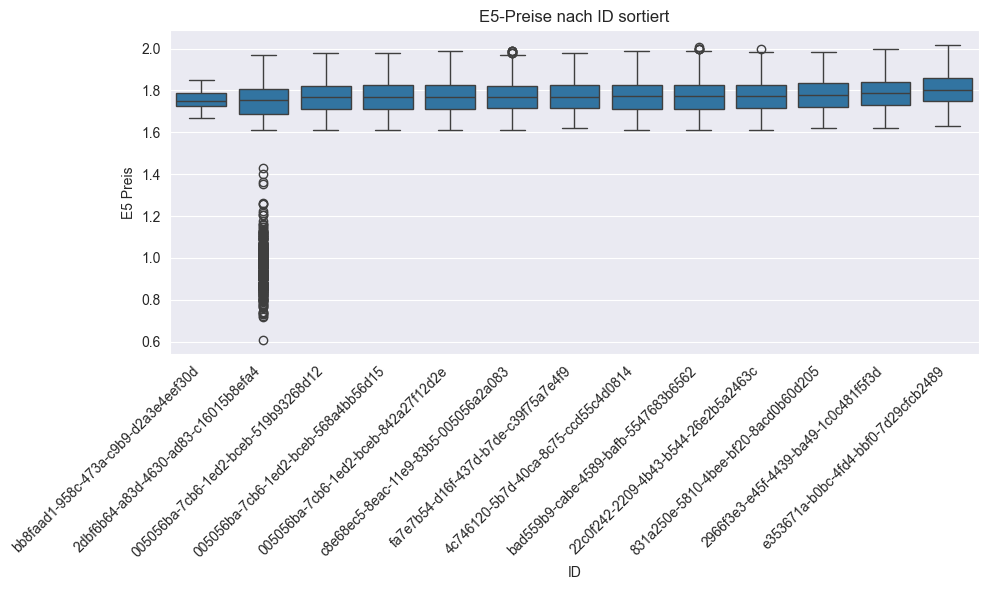

In [10]:
# Quelle: https://seaborn.pydata.org/generated/seaborn.boxplot.html
sns.boxplot(data=df, x='station_uuid', y='e5', order=df.groupby('station_uuid')['e5'].median().sort_values().index)

plt.figure(figsize=(10, 6))
plt.title('E5-Preise nach ID sortiert')
plt.xlabel('ID')
plt.ylabel('E5 Preis')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Auffälligkeiten:
- Gleich den Marken, nur dass alle Tankstellen dargestellt werden.

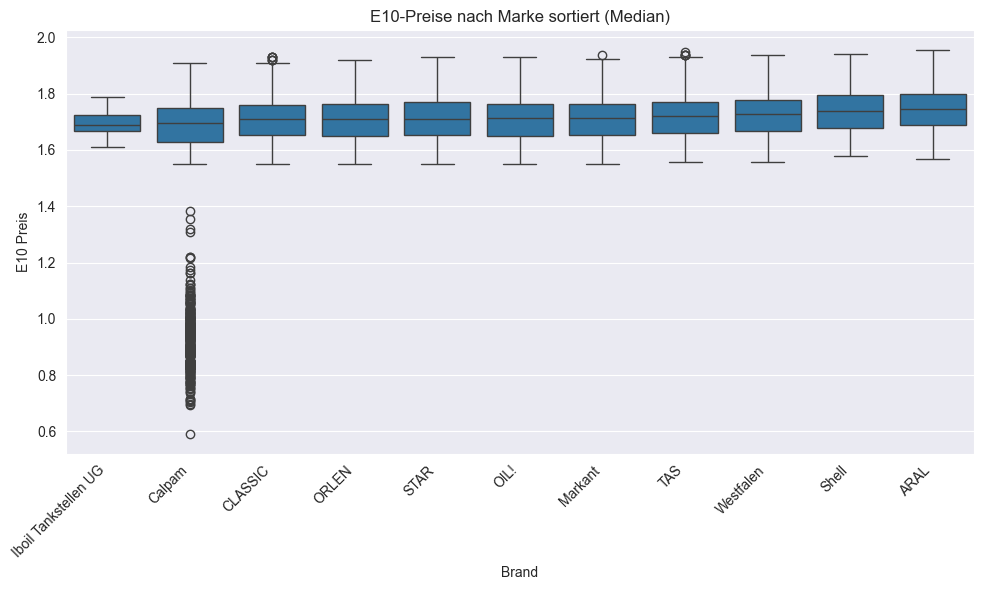

In [11]:
# Quelle: https://seaborn.pydata.org/generated/seaborn.boxplot.html
sns.boxplot(data=df, x='brand', y='e10', order=df.groupby('brand')['e10'].median().sort_values().index)

plt.figure(figsize=(10, 6))
plt.title('E10-Preise nach Marke sortiert (Median)')
plt.xlabel('Brand')
plt.ylabel('E10 Preis')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Auffälligkeiten:
- Ähnlich zu E10.

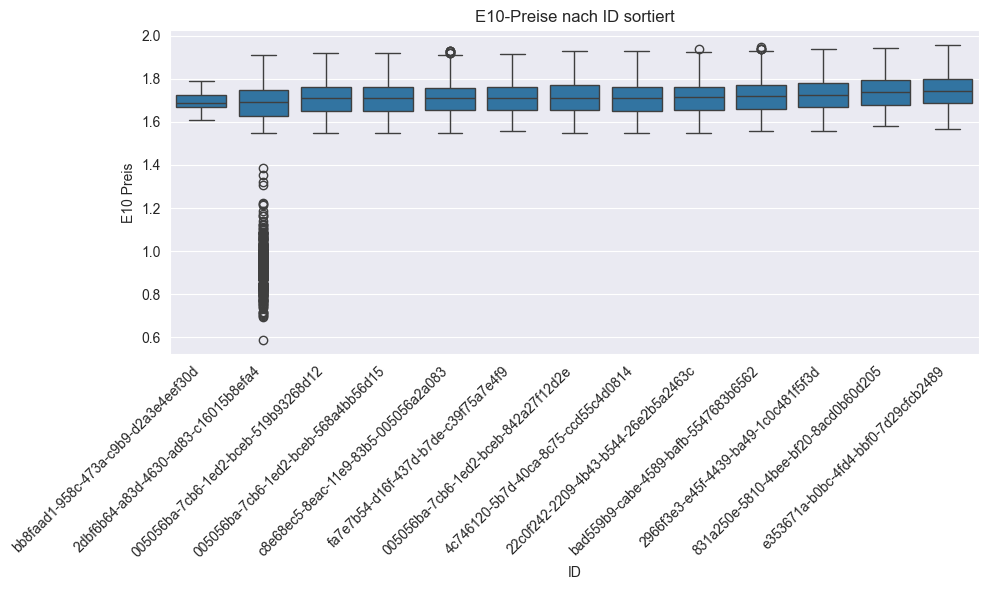

In [12]:
# Quelle: https://seaborn.pydata.org/generated/seaborn.boxplot.html
sns.boxplot(data=df, x='station_uuid', y='e10', order=df.groupby('station_uuid')['e10'].median().sort_values().index)

plt.figure(figsize=(10, 6))
plt.title('E10-Preise nach ID sortiert')
plt.xlabel('ID')
plt.ylabel('E10 Preis')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Auffälligkeiten:
- Ähnlich zu E5.

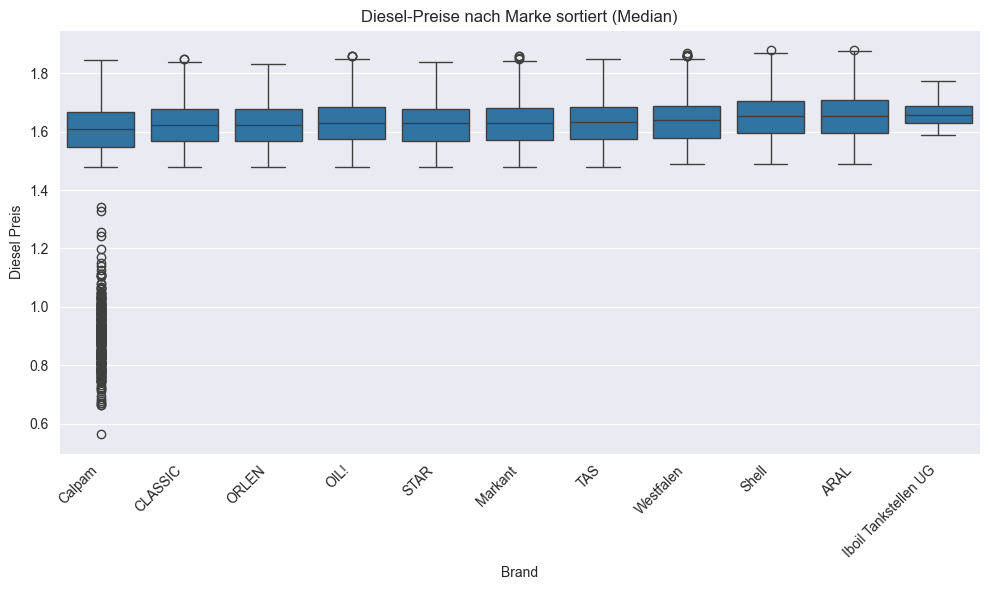

In [13]:
# Quelle: https://seaborn.pydata.org/generated/seaborn.boxplot.html
sns.boxplot(data=df, x='brand', y='diesel', order=df.groupby('brand')['diesel'].median().sort_values().index)

plt.figure(figsize=(10, 6))
plt.title('Diesel-Preise nach Marke sortiert (Median)')
plt.xlabel('Brand')
plt.ylabel('Diesel Preis')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Auffälligkeiten:
- Ähnlich zu E5 und E10

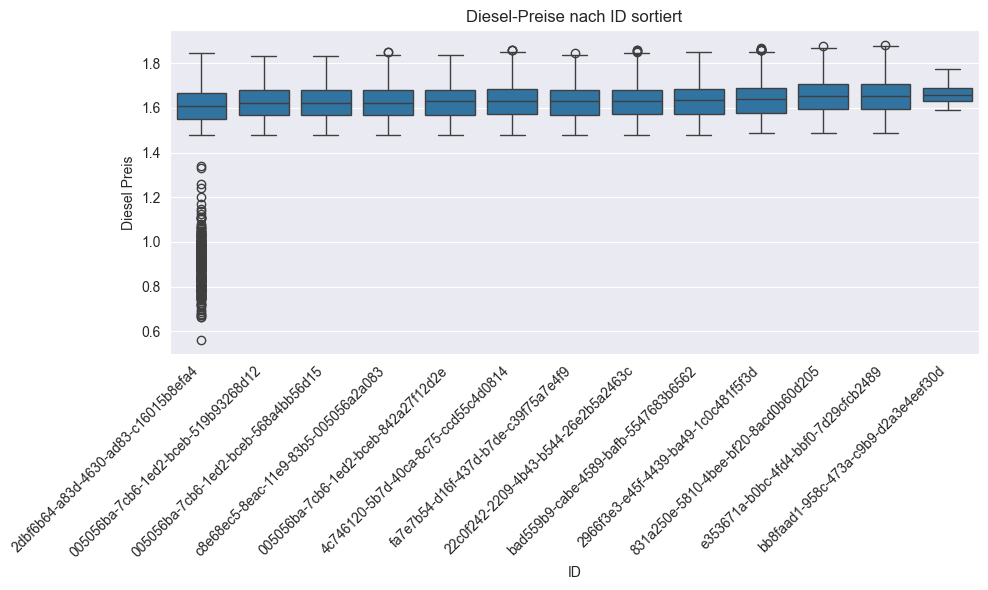

In [14]:
# Quelle: https://seaborn.pydata.org/generated/seaborn.boxplot.html
plt.show()
sns.boxplot(data=df, x='station_uuid', y='diesel', order=df.groupby('station_uuid')['diesel'].median().sort_values().index)

plt.figure(figsize=(10, 6))
plt.title('Diesel-Preise nach ID sortiert')
plt.xlabel('ID')
plt.ylabel('Diesel Preis')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Auffälligkeiten:
- Ähnlich zu E5 und E10

## Kraftstoff vs. Kraftstoff-Change

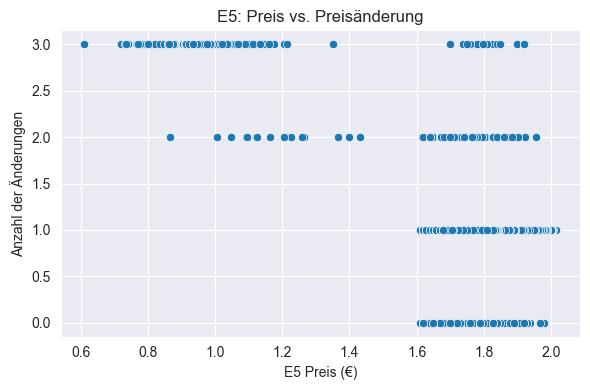

In [15]:
# Quelle: https://seaborn.pydata.org/generated/seaborn.scatterplot.html
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='e5', y='e5change')
plt.title("E5: Preis vs. Preisänderung")
plt.xlabel("E5 Preis (€)")
plt.ylabel("Anzahl der Änderungen")
plt.tight_layout()
plt.show()

Auffälligkeiten:
- fast ausschließlich bei 0, 1 und 2 (und einige bei 3).
- Preisänderungen innerhalb derselben Stunde sind selten. Besonders bei Preisen zwischen 1.70€ und 1.90€.
- Bei Preisen zwischen 1.75€ und 1.85€ treten auch mehrfache Preisänderungen (2–3×) auf.
- Es tauchen Preise unter 1.00€ auf, teils bei bis zu 3 Preisänderungen – z.B. bei 0.60€, 0.80€.
    - Datenfehler?

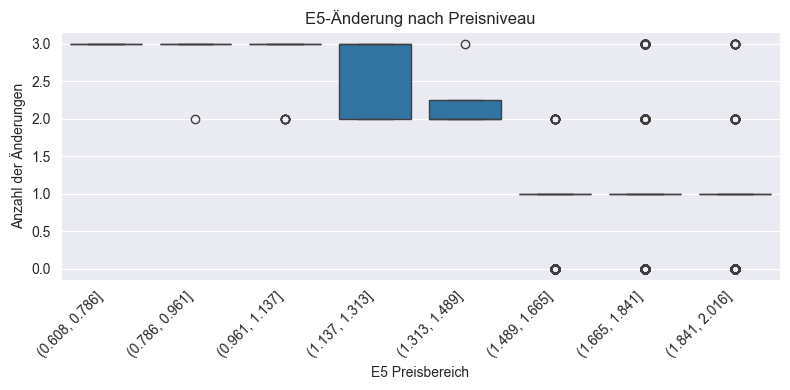

In [16]:
# Quelle: https://seaborn.pydata.org/generated/seaborn.boxplot.html
df['e5_bin'] = pd.cut(df['e5'], bins=8)
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='e5_bin', y='e5change')
plt.title("E5-Änderung nach Preisniveau")
plt.xlabel("E5 Preisbereich")
plt.ylabel("Anzahl der Änderungen")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Auffälligkeiten:
- In den Preisbereichen (1.313 bis 1.489)  und (1.489 bis 1.665) finden die meisten Änderungen statt.
- In Bereichen wie (0.608 bis0.961) finden zwar Änderungen statt (Ausreißer), aber keine nennenswerte Verteilung
- In den höheren Preisbereichen (ab 1.665€) sind nur vereinzelte Datenpunkte sichtbar, meist bei 1 und 2 Änderungen.

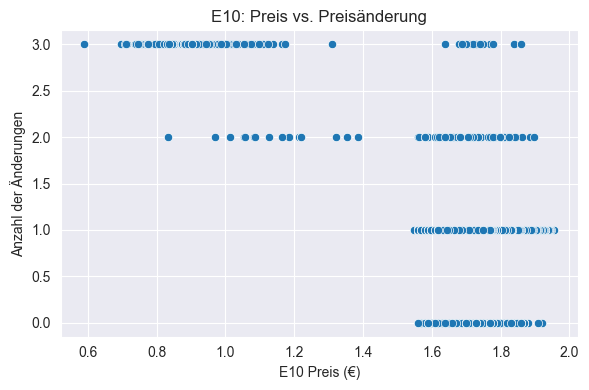

In [17]:
# Quelle: https://seaborn.pydata.org/generated/seaborn.scatterplot.html
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='e10', y='e10change')
plt.title("E10: Preis vs. Preisänderung")
plt.xlabel("E10 Preis (€)")
plt.ylabel("Anzahl der Änderungen")
plt.tight_layout()
plt.show()

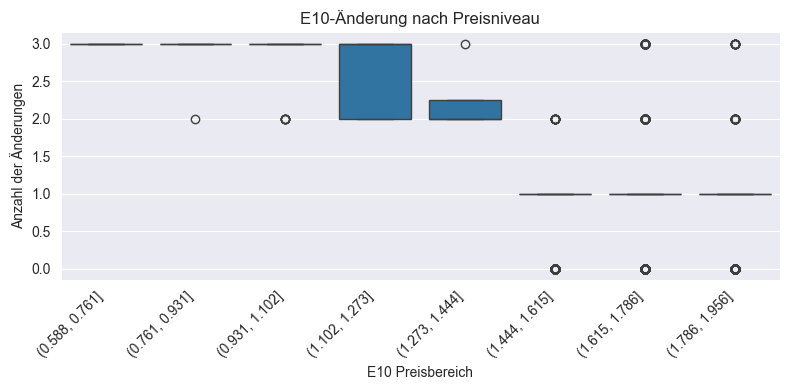

In [18]:
# Quelle: https://seaborn.pydata.org/generated/seaborn.boxplot.html
df['e10_bin'] = pd.cut(df['e10'], bins=8)
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='e10_bin', y='e10change')
plt.title("E10-Änderung nach Preisniveau")
plt.xlabel("E10 Preisbereich")
plt.ylabel("Anzahl der Änderungen")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

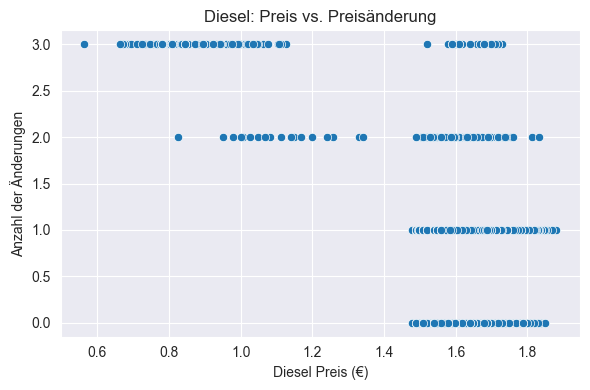

In [19]:
# Quelle: https://seaborn.pydata.org/generated/seaborn.scatterplot.html
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='diesel', y='dieselchange')
plt.title("Diesel: Preis vs. Preisänderung")
plt.xlabel("Diesel Preis (€)")
plt.ylabel("Anzahl der Änderungen")
plt.tight_layout()
plt.show()

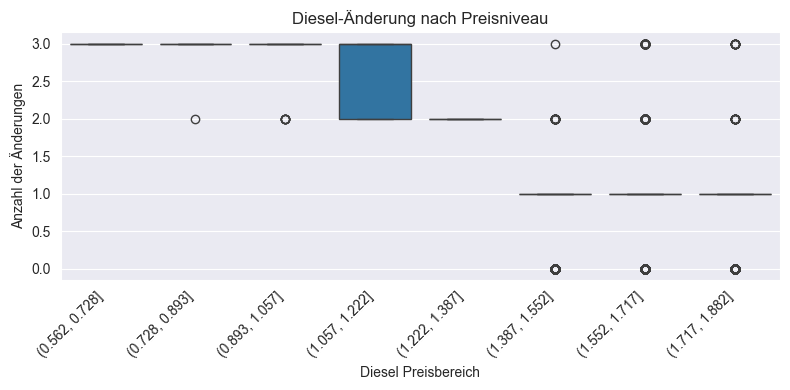

In [20]:
# Quelle: https://seaborn.pydata.org/generated/seaborn.boxplot.html
df['diesel_bin'] = pd.cut(df['diesel'], bins=8)
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='diesel_bin', y='dieselchange')
plt.title("Diesel-Änderung nach Preisniveau")
plt.xlabel("Diesel Preisbereich")
plt.ylabel("Anzahl der Änderungen")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Wochentag vs. Öffnungszeit

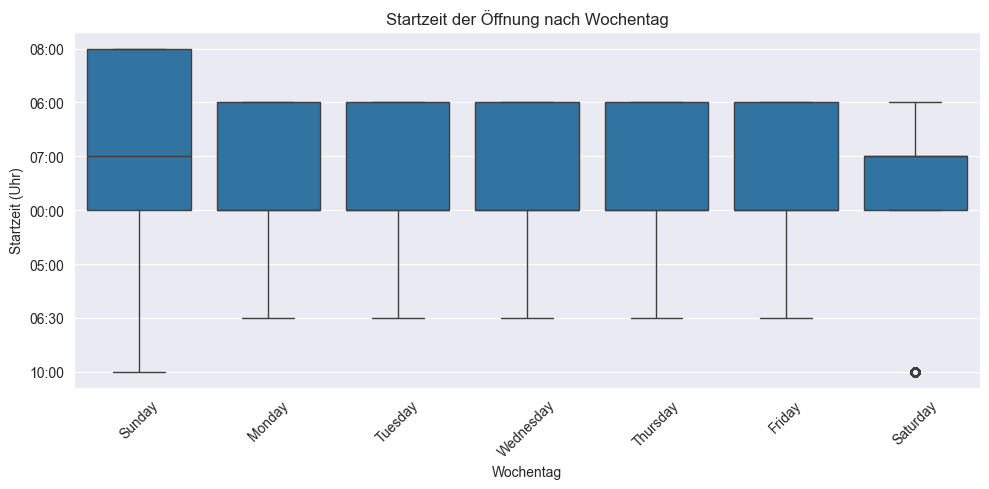

In [21]:
# Quelle: https://seaborn.pydata.org/generated/seaborn.boxplot.html
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='weekday', y='start_time')
plt.title("Startzeit der Öffnung nach Wochentag")
plt.xlabel("Wochentag")
plt.ylabel("Startzeit (Uhr)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Auffälligkeiten:
- Sonntag ist der unregelmäßigste Öffnungstag.
- Die meisten Tankstellen öffnen werktags sehr einheitlich und früh.
- Samstag ebenfalls früh, aber etwas später und mit vereinzelten Spätschichten.